In [38]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import concurrent.futures
from draw import draw_bounding_box_on_image as draw
from PIL import Image
from PIL import ImageColor
from IPython.display import display as ds

In [4]:
file = os.listdir(r"C:\Users\sky66\fiftyone\open-images-v6\validation\data")
for _ in range(len(file)):
    file[_] = file[_].split(".")[0]

In [12]:
p = r"C:\Users\sky66\fiftyone\open-images-v6\validation\labels\detections.csv"
data = []
with open(p, "r", encoding="utf8") as f:
    c = iter(f)
    info = next(c).strip().split(",")
    info = [info[0], info[4], info[5] , info[6] , info[7] ]
    data.append(info)
    try:
        while True:
            s = next(c).strip().split(",")
            cls = s[2]
            if (s[0] in file) and (cls=="/m/04yx4" or cls=="/m/03bt1vf" or cls=="/m/01bl7v" or cls=="/m/05r655"):
                data.append([s[0], s[4], s[5] , s[6] , s[7] ])
    except:
        pass

In [17]:
with open("open_images_v6_bbox.csv", "w", encoding="utf8") as f:
    for e in range(len(data)):
        c = ",".join(data[e])+"\n"
        f.write(c)

In [20]:
imgPath = r"C:\Users\sky66\fiftyone\open-images-v6\validation\data"

C:\Users\sky66\fiftyone\open-images-v6\validation\data\00075905539074f2.jpg


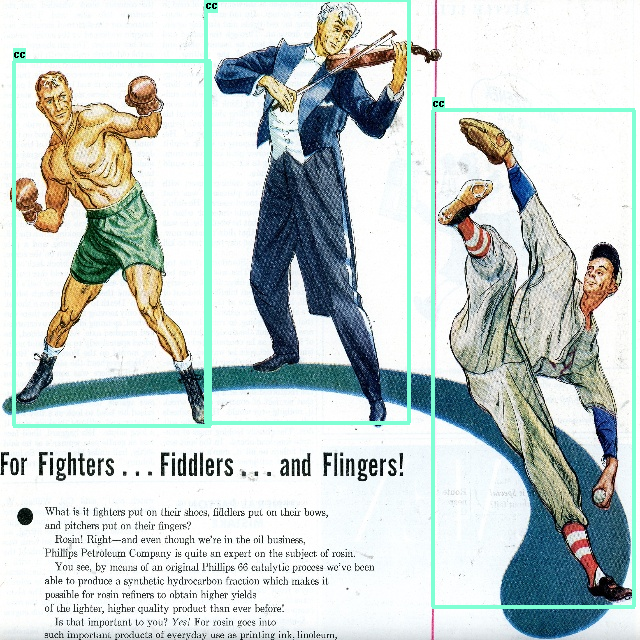

In [45]:
ids = 0
f = file[ids]
bbox = []
for e in data:
    if e[0]==f:
        bbox.append([float(i) for i in [e[3], e[1], e[4], e[2]]])
path = os.path.join(imgPath, f+".jpg")
print(path)
a = cv2.imread(path)
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
color = list(ImageColor.colormap.values())[3]
for e in bbox:
    a = draw(a, *e, color=color, display_str_list=["CC"])
ds(a)